In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
def show_kernel(kernel, label=True, digits=None, test_size=28):
    #format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits) #숫자가 아니면 반올림할 것
    
    #Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max() + kernel.min()) / 2 #중간값
    
    # Optionally, add value labels
    # The product() method of the itertools module returns the cartesian product of the input iterables.
    # Cartesian product is result of all possible combinations of two sets taking into account order of the sets.
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                    color = color,
                    size = test_size,
                    horizontalalignment = 'center', 
                    verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

Two most important types of layers that we can find in the baseof convnet image classifier. 
1. **convolutional layer with Relu activation**
2. maximum pooling layer

# Feature Extraction
1. Filter (convolution)
2. Detect (ReLU)
3. Condense (maximum pooling)

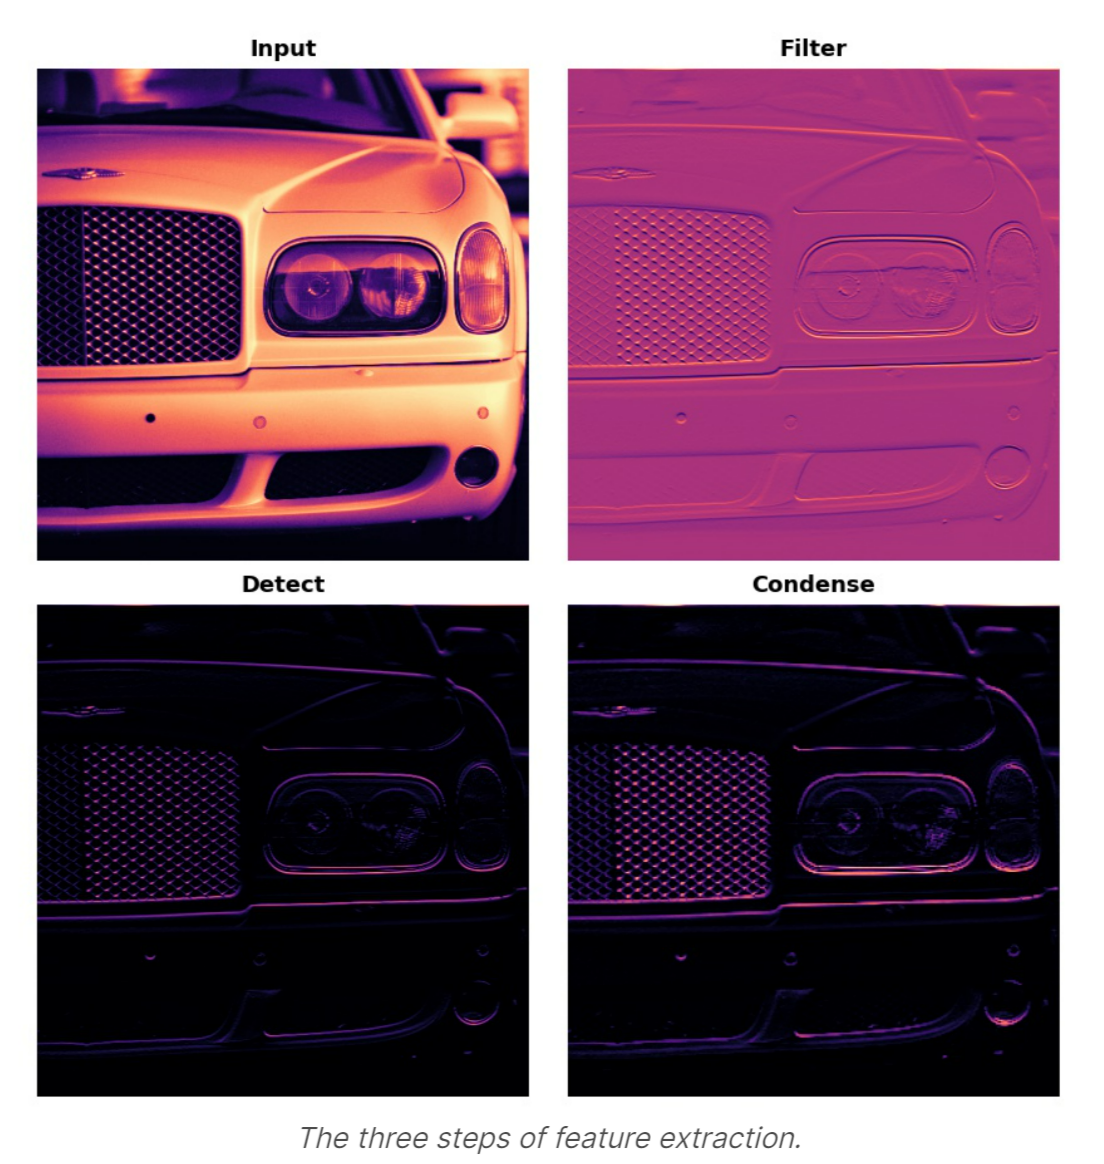

# 1. Filter

In [3]:
# define a convolutional layer in a keras model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential([Conv2D(filters = 64, kernel_size=3)])

finding the best values for its kernels.

## feature maps
= activations in the network = result of applying a filter to img
- 주로 커널의 positive numbers에 해당하는 부분의 input들이 accentuate된다
- `filters` => tell the convolutional layer how many feature maps you want it to create as output

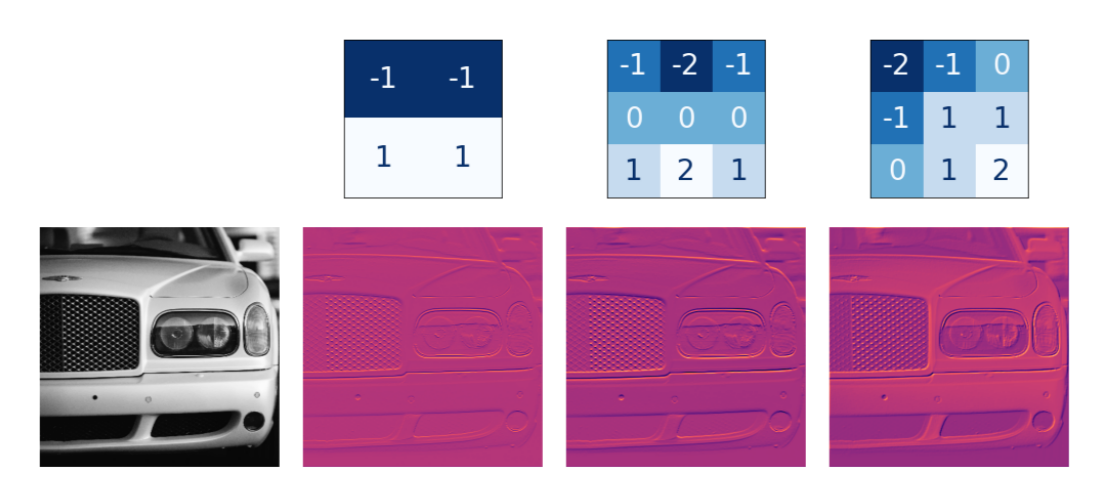

# 2. Detect with ReLU
- 음수 부분에서 함수값(rectified, 수정값) = 0
- ReLU = Rectified Liner Unit
- Activation Function
- The ReLU activation says that negative values are not important and so sets them to 0
  
- Nonlinearity

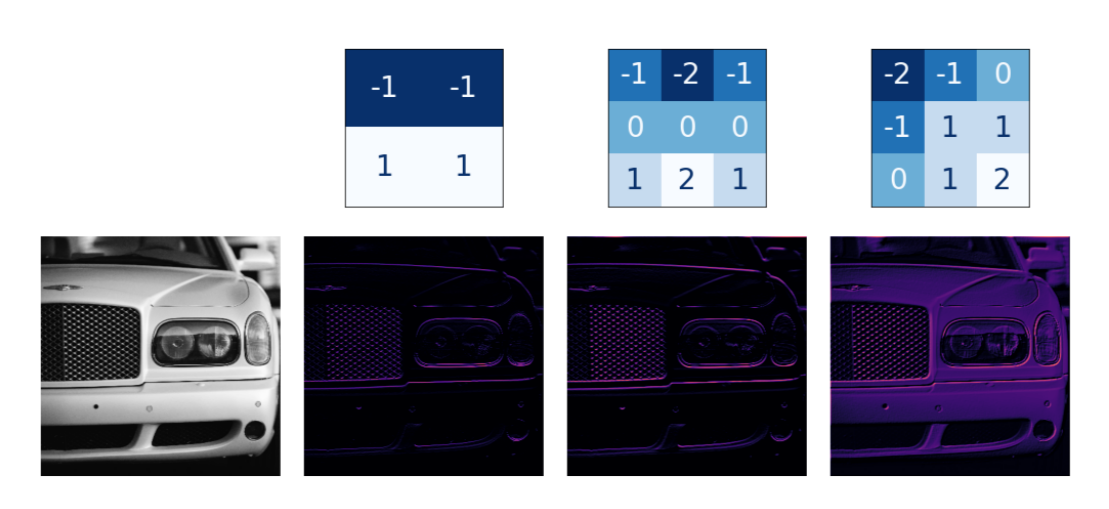

In [4]:
model = Sequential([Conv2D(filters=64, kernel_size=3, activation='relu')])

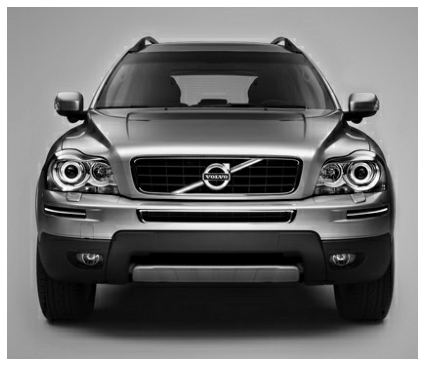

In [6]:
# Example - Apply Convolution and ReLU
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'input/computer-vision-resources/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize= (6,6))
plt.imshow(tf.squeeze(image), cmap = 'gray') # returns a tensor with the same value as its first argument, but a different shape
plt.axis('off') #축 지우기
plt.show();

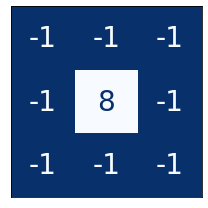

In [7]:
# Edge detection kernel
kernel = tf.constant([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

plt.figure(figsize=(3,3))
show_kernel(kernel)

TensorFlow includes many common operations performed by neural networks in its tf.nn module.

In [8]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [9]:
image.shape

TensorShape([1, 361, 421, 1])

In [10]:
kernel.shape

TensorShape([3, 3, 1, 1])

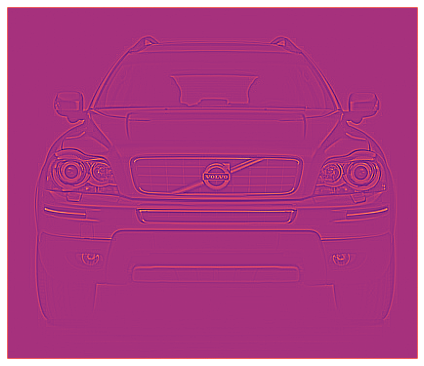

In [11]:
# 1. filter
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

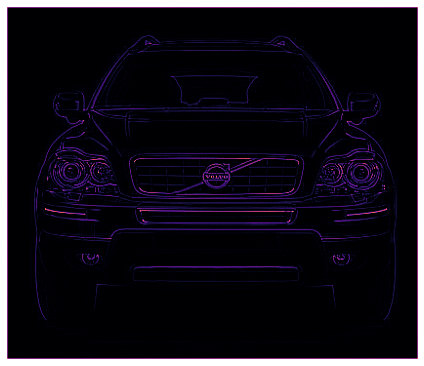

In [12]:
# Detect with ReLU
image_detect = tf.nn.relu(image_filter)
plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

we've created a feature map. **Head** will gonna use it to classify.
